Train

In [8]:
!python ../../dump_dataset.py -o 5000 -c 100 -j 7

Set random seed to 7
100%|███████████████████████████████████████| 5000/5000 [10:46<00:00,  7.73it/s]


Test

In [9]:
!python ../../dump_dataset.py -o 1000 -c 100 -j 8

Set random seed to 8
100%|███████████████████████████████████████| 1000/1000 [02:09<00:00,  7.73it/s]


In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_30/train_1_sr_30.tfrecord \
    --test_file=sr_30/test_2_sr_30.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_30 \
    --export_dir=export_sr_30 \
    --variable_number=30 \
    --clause_number=90 \
    --train_files_gzipped=False \
    --batch_size=64 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_50/train_3_sr_50.tfrecord \
    --test_file=sr_50/test_4_sr_50.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_50 \
    --export_dir=export_sr_50 \
    --variable_number=50 \
    --clause_number=150 \
    --train_files_gzipped=False \
    --batch_size=64 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_70/train_5_sr_70.tfrecord \
    --test_file=sr_70/test_6_sr_70.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_70 \
    --export_dir=export_sr_70 \
    --variable_number=70 \
    --clause_number=210 \
    --train_files_gzipped=False \
    --batch_size=32 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_100/train_7_sr_100.tfrecord \
    --test_file=sr_100/test_8_sr_100.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_100 \
    --export_dir=export_sr_100 \
    --variable_number=100 \
    --clause_number=300 \
    --train_files_gzipped=False \
    --batch_size=16 \
    --export_model \
    --attention=True

/tmp/ipykernel_3813815/2314979520.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['SR'])


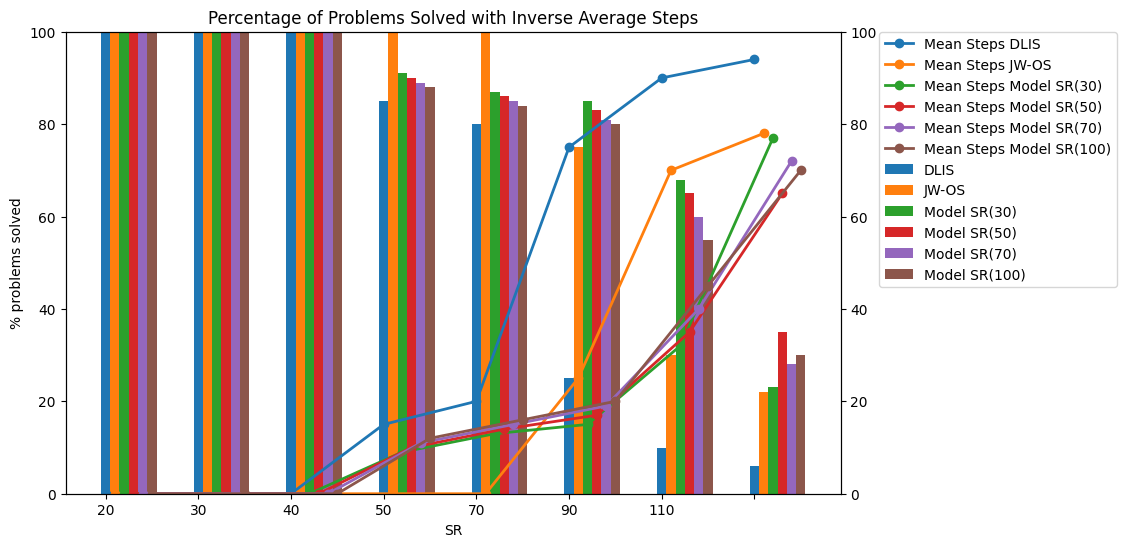

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos ficticios para % de problemas resueltos
data = {
    'SR': [10, 20, 30, 40, 50, 70, 90, 110],
    'DLIS': [100, 100, 100, 85, 80, 25, 10, 6],
    'JW-OS': [100, 100, 100, 100, 100, 75, 30, 22],
    'Model SR(30)': [100, 100, 100, 91, 87, 85, 68, 23],
    'Model SR(50)': [100, 100, 100, 90, 86, 83, 65, 35],
    'Model SR(70)': [100, 100, 100, 89, 85, 81, 60, 28],
    'Model SR(100)': [100, 100, 100, 88, 84, 80, 55, 30],
}

# Crear DataFrame
df = pd.DataFrame(data)

C = 100  # Constante ajustable

for column in df.columns[1:]:
    df[f'Mean Steps {column}'] = C - df[column]
# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Preparar datos para el gráfico de barras
bar_width = 0.1
index = np.arange(len(df['SR']))  # Array de índices para el eje X

# Graficar las barras y líneas para cada modelo
for i, column in enumerate(df.columns[1:7]):  # Las primeras 6 son modelos
    # Graficar barras
    ax1.bar(index + i * bar_width, df[column], bar_width, label=column)

    # Graficar línea de media de steps
    ax1.plot(index + i * bar_width, df[f'Mean Steps {column}'], linestyle='-', marker='o', color=ax1.patches[-1].get_facecolor(), linewidth=2, label=f'Mean Steps {column}')

# Configuración de los ejes
ax1.set_xlabel('SR')
ax1.set_ylabel('% problems solved')
ax1.set_xticklabels(df['SR'])

# Ajustar límites del eje y para asegurar visibilidad y claridad
ax1.set_ylim(0, 100)
ax2 = ax1.twinx()
ax2.set_ylim(0, 100)  # Ajustar según necesidades de visualización de las líneas

# Añadir leyenda
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Mostrar el gráfico
plt.title('Percentage of Problems Solved with Inverse Average Steps')
plt.show()
